<a href="https://colab.research.google.com/github/nasif-raihan/Image-Processing/blob/main/DIP_CT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
from google.colab import drive
from google.colab.patches import cv2_imshow

%matplotlib inline

In [ ]:
drive.mount('/content/datasets/')

Mounted at /content/datasets/


In [ ]:
path = '/content/datasets/MyDrive/Lab/1+2.png'

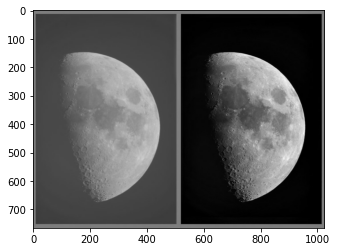

In [ ]:
img = cv.imread(path)
plt.imshow(img)

In [ ]:
img.shape

(765, 1024, 3)

Convert the image into gray scale image.

In [ ]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray_img.shape

(765, 1024)

# 1. Smoothing in Spatial domain

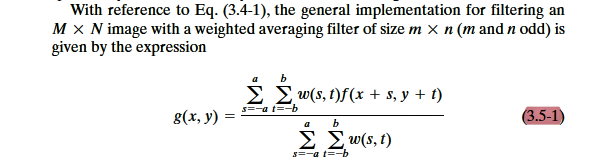

In [ ]:
box_filter = np.ones(9)

f1 = box_filter.reshape(3, 3)

f1

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
k , l = 0, 0

smooth_img = gray_img

#filter X image
for i in range(3):
  for j in range(3):
    smooth_img[k][l] = f1[i][j]*gray_img[k+i][l+j]
    l += 1
  k += 1

#Summation of filter's pixel
f1_sum = 0

for i in range(3):
  for j in range(3):
    f1_sum += f1[i][j]

print(f1_sum)

9.0


In [ ]:
print(smooth_img.dtype)
smooth_img =smooth_img.astype('float64')
print(smooth_img.dtype)

smooth_img /= f1_sum

uint8
float64


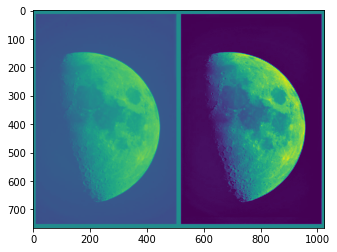

In [ ]:
plt.imshow(smooth_img)
# cv2_imshow(smooth_img)

**Explanation:** Application of spatial averaging is to blur an image for the purpose of getting a gross representation of objects of interest, such that the intensity of smaller objects blends with the background and larger objects become “bloblike” and easy to detect.The size of the mask establishes the relative size of the objects that will be blended with the background.

# 2.Sharpening in Spatial Domain

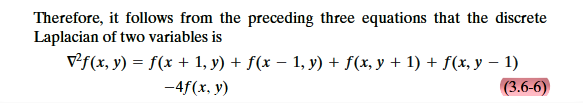

In [ ]:
gray_img.shape

(765, 1024)

In [ ]:
sharp_img = gray_img

In [ ]:
for i in range(1, 764):
  for j in range(1, 1023):
    sharp_img[i][j] = gray_img[i+1][j]  + gray_img[i-1][j]  + gray_img[i][j+1]  + gray_img[i][j-1]  + 4*gray_img[i][j]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


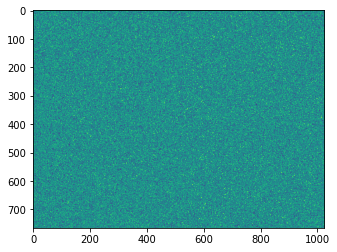

In [ ]:
plt.imshow(sharp_img)
# cv2_imshow(sharp_img)

**Explanation:** 

The Laplacian is a derivative operator, its use highlights intensity discontinuities in an image and deemphasizes regions with slowly varying intensity levels.This will tend to produce images that have grayish edge lines and other discontinuities, all superimposed on a dark, featureless background. Background features can be “recovered” while still preserving the sharpening effect of the Laplacian simply by adding the Laplacian image to the original.

# 3.Low pass in Frequency Domain

Passes signals with a frequency lower than a certain cutoff frequency and attenuates signals with frequencies higher than the ***cutoff*** frequency.

In [ ]:
box_filter = np.zeros(25)

f2 = box_filter.reshape(5, 5)

f2[2][2] = 1

f2

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

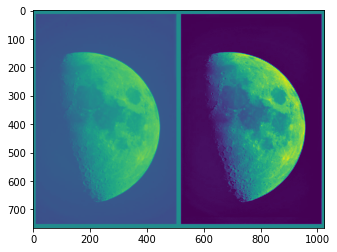

In [ ]:
image = img[:, :, 0]
lowpass_img = ndimage.convolve(image, f2)

plt.imshow(lowpass_img)
# cv2_imshow(lowpass_img)

Due to decreasing the disparity between pixel values by averaging nearby pixels the image become smooth. Here the kernel is designed to maintain pixel balance attenuating the high frquency relative to it's neighboring pixels.

# 4.High pass in Frequency Domain

Passes signals with a frequency higher than a certain cutoff frequency and attenuates signals with frequencies lower than the ***cutoff*** frequency.

In [ ]:
box_filter = np.ones(25)

f3 = box_filter.reshape(5, 5)

f3[2][2] = 0

f3

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

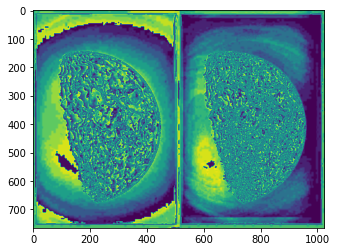

In [ ]:
image = img[:, :, 0]
highpass_img = ndimage.convolve(image, f3)

plt.imshow(highpass_img)
# cv2_imshow(highpass_img)

Due to enhancement of the contrast between adjoining areas with little variation in brightness and darkness the edges of the image become sharper. High pass filter tends to retain the high frequency information within an image while reducing the low frequency information. Here the kernel is designed to increase the brightness of the center pixel relative to neighboring pixels.

# Write Images

In [ ]:
cv.imwrite('smooth_img.jpg', smooth_img)
cv.imwrite('sharp_img.jpg', sharp_img)
cv.imwrite('lowpass_img.jpg', lowpass_img)
cv.imwrite('highpass_img.jpg', highpass_img)

True